In [55]:
import pandas as pd
df=pd.read_csv(r"basic_features_df.csv", sep="|", lineterminator='\n')
display(df.head(1400))

,Level,Title,Text,Source,Type,cleanedText,RFTagger,parsedText,newLevel,preprocessedText,average_sentence_length,average_syllable_word,Flesch_Reading_Ease_Score,Flesch_Kincaid_readability,percentag_hard_words,fog,polysyllable_count,smog,average_character_per_word,text_length
0,A1,Meine Familie,Zu meiner Familie gehören vier Personen. Die M...,https://german.net/reading/familie/,Reading,Zu meiner Familie gehören vier Personen. Die M...,"[[['Zu', 'APPR', 'Dat'], ['meiner', 'PRO', 'Po...",['(ROOT (S (PP (APPR Zu) (PPOSAT meiner) (NN F...,A,"[[['Zu', 'APPR', 'Dat'], ['meiner', 'PRO', 'Po...",9.153846,1.605769,61.695769,7.930769,0.144231,3.719231,15,6.872983,4.277311,119
1,A1,Maria und ihre Familie,Mein Name ist Maria. Ich bin 30 Jahre alt. Zu ...,https://german.net/reading/marias-familie/,Reading,Mein Name ist Maria. Ich bin 30 Jahre alt. Zu ...,"[[['Mein', 'PRO', 'Poss', 'Attr', '-', 'Nom', ...",['(ROOT (S (NP (PPOSAT Mein) (NN Name)) (VAFIN...,A,"[[['Mein', 'PRO', 'Poss', 'Attr', '-', 'Nom', ...",8.600000,1.483444,72.606662,6.241325,0.086093,3.474437,13,6.605551,4.005814,172
2,A1,Ich bin Tom,Hallo! Ich bin Tom Maier. Ich bin 13 Jahre alt...,https://german.net/reading/tom/,Reading,Hallo! Ich bin Tom Maier. Ich bin 13 Jahre alt...,"[[['Hallo', 'ITJ'], ['!', 'SYM', 'Pun', 'Sent'...","['(ROOT (NUR (ITJ Hallo) ($. !)))', '(ROOT (S ...",A,"[[['Hallo', 'ITJ'], ['!', 'SYM', 'Pun', 'Sent'...",7.588235,1.654206,59.187147,7.885761,0.084112,3.068939,9,6.000000,4.503876,129
3,A1,Freundinnen,Ricarda ist 21 Jahre alt und wohnt in Lübeck. ...,https://german.net/reading/freundinnen/,Reading,Ricarda ist 21 Jahre alt und wohnt in Lübeck. ...,"[[['Ricarda', 'N', 'Name', 'Nom', 'Sg', 'Fem']...",['(ROOT (CS (S (NE Ricarda) (VAFIN ist) (AP (N...,A,"[[['Ricarda', 'N', 'Name', 'Nom', 'Sg', 'Fem']...",7.666667,1.580000,65.385333,7.026667,0.100000,3.106667,10,6.162278,4.365217,115
4,A1,Einkaufen im Supermarkt,Frau Meier geht heute in den Supermarkt. Ihr M...,https://german.net/reading/einkaufen/,Reading,Frau Meier geht heute in den Supermarkt. Ihr M...,"[[['Frau', 'N', 'Reg', 'Nom', 'Sg', 'Fem'], ['...",['(ROOT (S (NP (NN Frau) (NE Meier)) (VVFIN ge...,A,"[[['Frau', 'N', 'Reg', 'Nom', 'Sg', 'Fem'], ['...",7.578947,1.524229,70.192589,6.322328,0.105727,3.073870,19,7.358899,4.100694,288
5,A1,Frühstück,Es ist 7 Uhr am Morgen. Familie Müller sitzt a...,https://german.net/reading/fruehstueck/,Reading,Es ist 7 Uhr am Morgen. Familie Müller sitzt a...,"[[['Es', 'PRO', 'Pers', 'Subst', '3', 'Nom', '...",['(ROOT (S (PPER Es) (VAFIN ist) (NP (CARD 7) ...,A,"[[['Es', 'PRO', 'Pers', 'Subst', '3', 'Nom', '...",6.736842,1.554545,68.482560,6.349282,0.081818,2.727464,9,6.000000,4.148438,128
6,A1,Susanne schreibt einen Brief,Lieber Thomas! Jetzt bist du weit weg! Ich bin...,https://german.net/reading/brief/,Reading,Lieber Thomas! Jetzt bist du weit weg! Ich bin...,"[[['Lieber', 'N', 'Reg', 'Nom', 'Sg', 'Masc'],...",['(ROOT (S (ADJD Lieber) (NP (NE Thomas)) ($. ...,A,"[[['Lieber', 'N', 'Reg', 'Nom', 'Sg', 'Masc'],...",6.111111,1.538462,70.478376,5.905983,0.098901,2.484005,9,6.000000,4.127273,110
7,A1,Der Skiurlaub,Hartmut hat im Februar eine Reise gemacht: Er ...,https://german.net/reading/skiurlaub/,Reading,Hartmut hat im Februar eine Reise gemacht: Er ...,"[[['Hartmut', 'N', 'Name', 'Nom', 'Sg', 'Masc'...",['(ROOT (CS (S (NE Hartmut) (VAFIN hat) (VP (P...,A,"[[['Hartmut', 'N', 'Name', 'Nom', 'Sg', 'Masc'...",9.400000,1.622807,60.004526,8.233684,0.122807,3.809123,14,6.741657,4.177305,141
8,A1,Struppi,Jan hat einen kleinen Hund. Er heißt Struppi u...,https://german.net/reading/struppi/,Reading,Jan hat einen kleinen Hund. Er heißt Struppi u...,"[[['Jan', 'N', 'Name', 'Nom', 'Sg', 'Masc'], [...",['(ROOT (S (NE Jan) (VAFIN hat) (NP (ART einen...,A,"[[['Jan', 'N', 'Name', 'Nom', 'Sg', 'Masc'], [...",8.866667,1.391304,80.130986,5.242319,0.026087,3.557101,3,4.732051,4.045113,133
9,A1,In der Schule,Heute ist der erste Schultag. Lena steht mit i...,https://german.net/reading/schule/

153


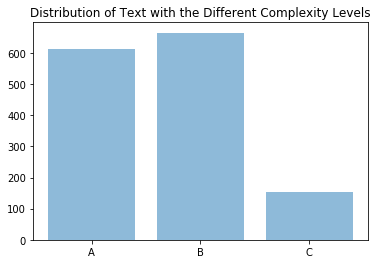

In [91]:
df_count= df['newLevel'].value_counts()
print(df_count[2])

plt.bar(df_count.index.values, df_count, align='center', alpha=0.5)
plt.title("Distribution of Text with the Different Complexity Levels")
 
plt.show()

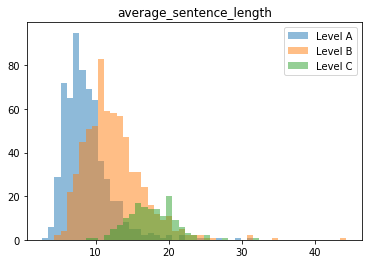

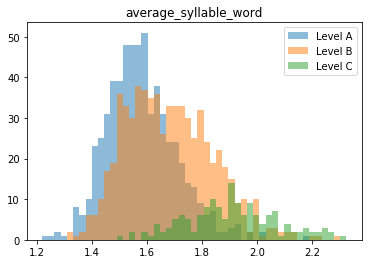

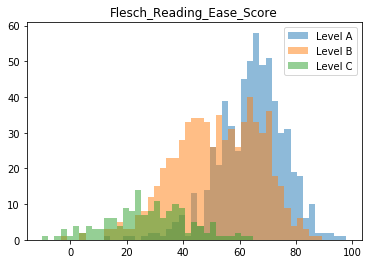

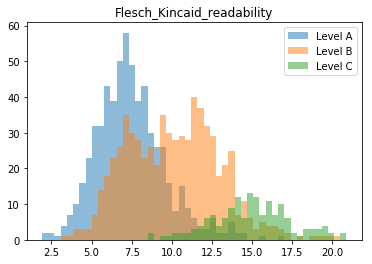

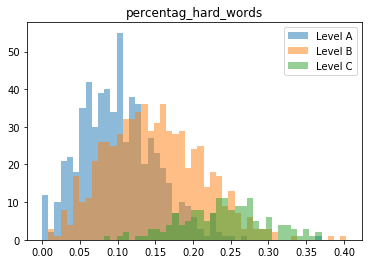

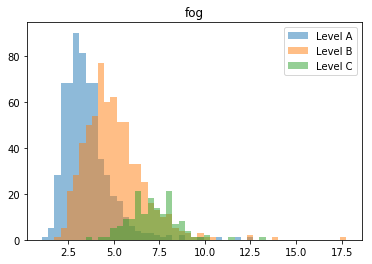

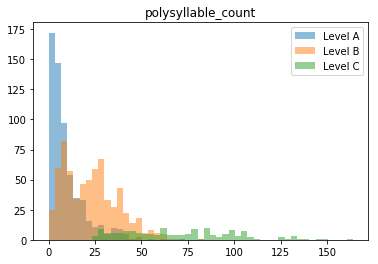

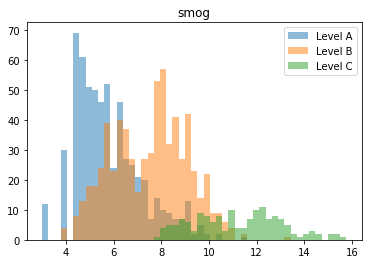

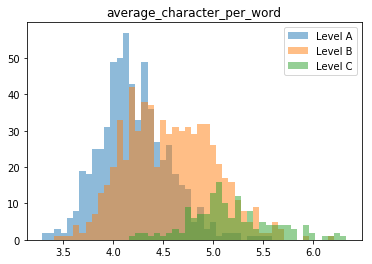

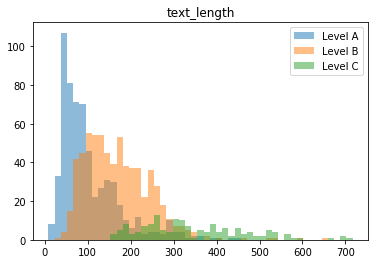

In [23]:
import math
import numpy as np
import matplotlib.pyplot as plt

features=["average_sentence_length",
          "average_syllable_word",
          "Flesch_Reading_Ease_Score",
          "Flesch_Kincaid_readability",
          "percentag_hard_words",
          "fog",
          "polysyllable_count",
          "smog",
          "average_character_per_word",
          "text_length"]
for feature in features: 
    a = df.loc[df['newLevel'] == "A"][feature]
    b = df.loc[df['newLevel'] == "B"][feature]
    c = df.loc[df['newLevel'] == "C"][feature]

    bins = np.linspace(df[feature].min(), df[feature].max(), 50)

    plt.hist(a, bins, alpha=0.5, label='Level A')
    plt.hist(b, bins, alpha=0.5, label='Level B')
    plt.hist(c, bins, alpha=0.5, label='Level C')
    plt.title(feature)
    
    plt.legend(loc='upper right')
    plt.show()

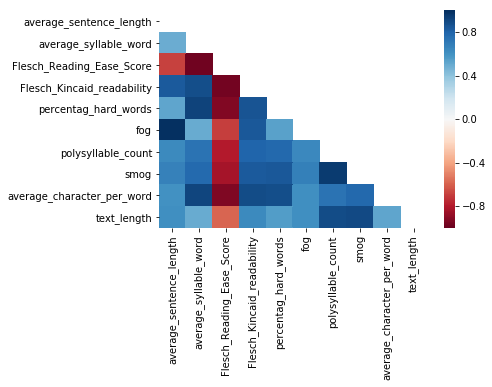

In [51]:
#import pandas.rpy2.common as com
import seaborn as sns
%matplotlib inline


# calculate the correlation matrix
corr = df[["average_sentence_length",
          "average_syllable_word",
          "Flesch_Reading_Ease_Score",
          "Flesch_Kincaid_readability",
          "percentag_hard_words",
          "fog",
          "polysyllable_count",
          "smog",
          "average_character_per_word",
          "text_length"]].corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# plot the heatmap
sns.heatmap(corr, 
            vmin=-1, vmax=1, mask=mask,
            cmap=plt.get_cmap("RdBu"),
        xticklabels=corr.columns,
        yticklabels=corr.columns)

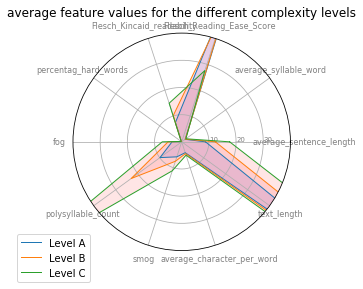

In [80]:
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
 
# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:
N = len(features)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], features, color='grey', size=8)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
plt.ylim(0,40)
 

# Ind1
values=df.groupby(["newLevel"]).mean()[features].loc["A"].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Level A")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values=df.groupby(["newLevel"]).mean()[features].loc["B"].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Level B")
ax.fill(angles, values, 'r', alpha=0.1)

values=df.groupby(["newLevel"]).mean()[features].loc["C"].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Level C")
ax.fill(angles, values, 'r', alpha=0.1)

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.title("average feature values for the different complexity levels")
plt.show()

[8.76920478965313,
 1.580230562113226,
 64.24675158372324,
 7.470448661219959,
 0.10131996727050863,
 3.54820990276946,
 9.874388254486133,
 5.81400424366953,
 4.209341792633533,
 102.8858075040783]